In [27]:
import numpy
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
nx = 81
ny = 81
c = 1
dx = 2/(nx-1)
dy = 2/(ny-1)
nt = 17
nu = 0.05


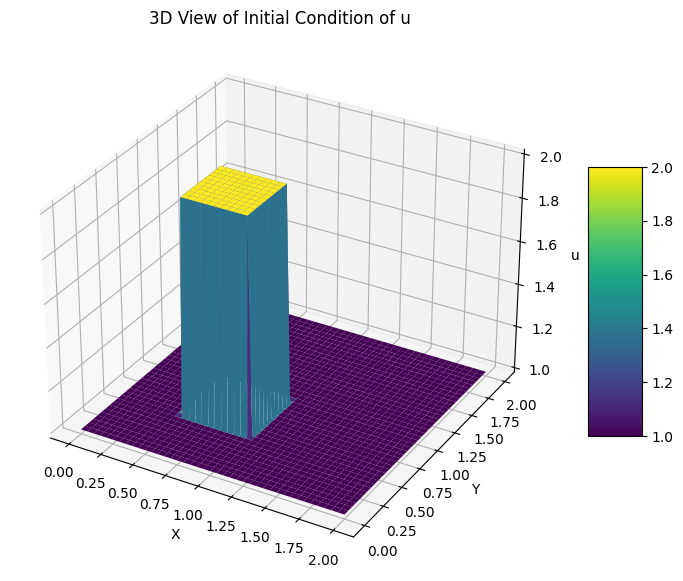

In [28]:


sigma = 0.2
dt = sigma * dx * dy / nu
x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,2,ny)

u = numpy.ones((ny,nx))
un = numpy.ones((ny,nx))
X, Y = numpy.meshgrid(x, y)

u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2


# Plotting the array u in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u, cmap='viridis', edgecolor='none')

# Adding labels and title
ax.set_title('3D View of Initial Condition of u')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u')

# Adding a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()



In [29]:



def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
    # Plotting the array u in 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, u, cmap='viridis', edgecolor='none')

    # Adding labels and title
    ax.set_title('3D View of Final Condition of u')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('u')

    # Adding a color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    plt.show()


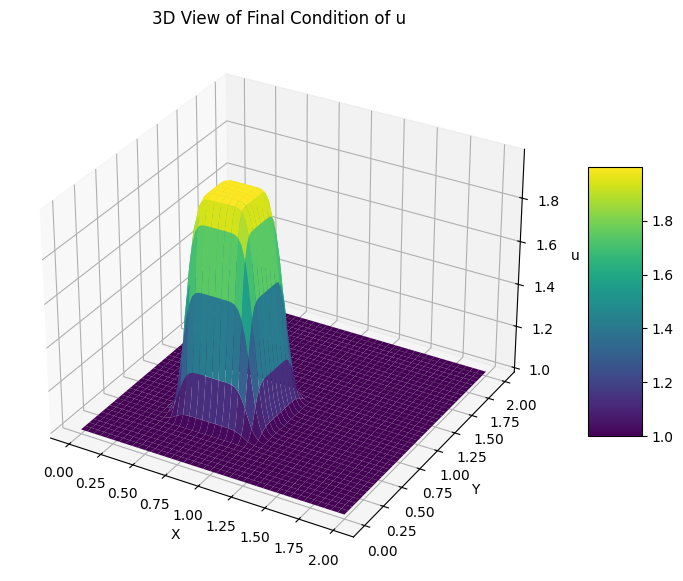

In [30]:
diffuse(10)

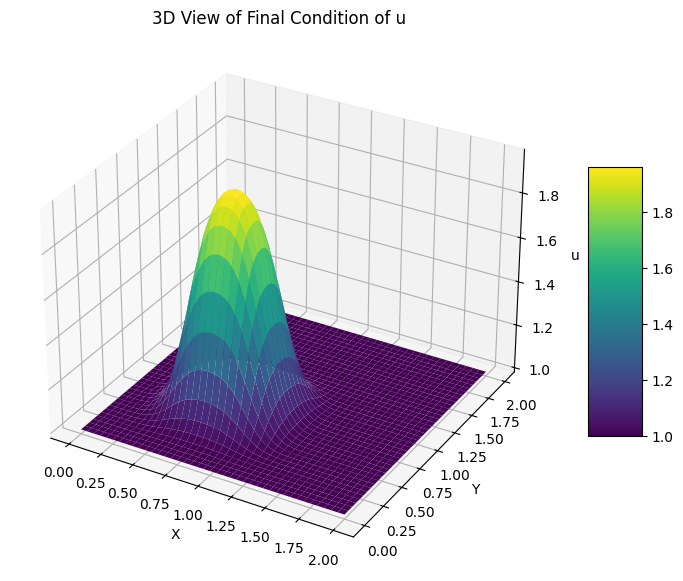

In [31]:
diffuse(50)

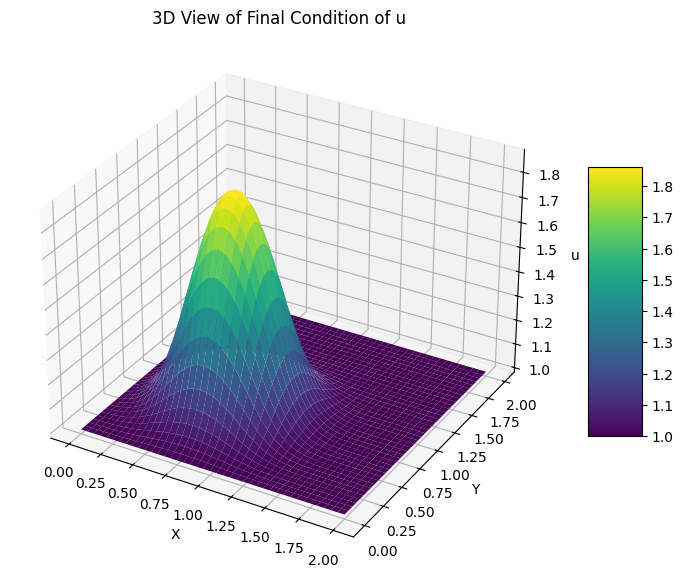

In [32]:
diffuse(100)